## ---------------------- Assignment 2 ----------------------

The problems are from Gonzalez & Woods version 3 (2008).

## Conceptual Questions:

# Problem 4.27

# Problem 4.28

# Problem 4.33

# Problem 5.10

The two subimages shown were extracted from the top right corners of Figs. 5.7(c) and (d), respectively. Thus, the subimage on the left is the result of using an arithmetic mean filter of size the other subimage is the result of using a geometric mean filter of the same size. 

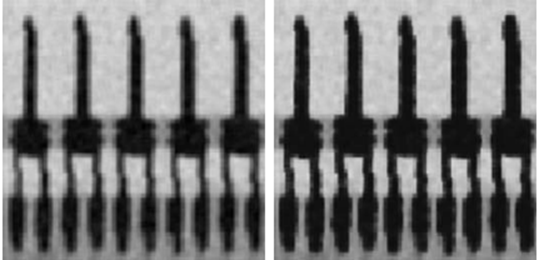

(a) Explain why the subimage obtained with geometric mean filtering is less blurred. (Hint: Start your analysis by examining a 1-D step transition in intensity.) 

Gaussian Lowpass Filter
-	A Gaussian Lowpass Filter is a type of filter that is commonly used in image processing, particularly for smoothing or blurring images. The Gaussian function has the following formula:

-	Size (M x N): This determines the dimensions of the Gaussian filter (M rows and N columns).

-	Center Location: You can shift the center of the Gaussian filter by adjusting the values of u and v.

Implement the Gaussian lowpass filter
1.	Apply Fourier Transform on the image 
2.	Apply the Gaussian Lowpass Filter on the image


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image from the specified path
image_path = r"/Assignment2\images\Fig0441(a)(characters_test_pattern).tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    print("Error loading image. Please check the file path.")
else:
    # Compute the 2D Fourier Transform of the image
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Function to create Gaussian Lowpass filter
    def gaussian_lowpass_filter(size, sigma, center=None):
        M, N = size
        u = np.fft.fftfreq(M, 1)
        v = np.fft.fftfreq(N, 1)
        u, v = np.meshgrid(u, v)

        if center is None:
            center = (M//2, N//2)
        u_shifted = u - center[0]
        v_shifted = v - center[1]

        filter = np.exp(-(u_shifted**2 + v_shifted**2) / (2 * sigma**2))
        return filter

    # Parameters for Gaussian filter
    sigma = 20  # Standard deviation of Gaussian filter

    # Create Gaussian Lowpass filter
    gaussian_filter = gaussian_lowpass_filter(image.shape, sigma)

    # Apply the filter in the frequency domain
    filtered_f_transform = f_transform_shifted * gaussian_filter
    filtered_f_transform_shifted_back = np.fft.ifftshift(filtered_f_transform)

    # Perform inverse Fourier Transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_f_transform_shifted_back)
    filtered_image = np.abs(filtered_image)

    # Display the original and filtered images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image (Gaussian Lowpass)")
    plt.axis('off')

    plt.show()


Error loading image. Please check the file path.


(b) Explain why the black components in the right image are thicker.

# Problem 5.13

# Problem 5.24

## Programming Question:

# Problem 1

Download Fig. 4.41(a) from the book web site.
Implement the Gaussian lowpass filter. You must be able to specify the
size, M x N, of the resulting 2D function. In addition, you must be able to specify the
location of the center of the Gaussian function.

# Problem 2

Download Fig. 5.7(a) from the book web site and add salt-and-pepper noise to it, 
with Pa = Pb = 0.2. Apply median filtering to the image. Explain any major 
differences between your result and Fig. 5.10(b).